In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
import string

In [5]:
text_data = pd.read_excel('C:/Users/Admin/Downloads/hotel_reviews.xlsx')
text_data.head(15)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
5,love monaco staff husband stayed hotel crazy w...,5.0
6,"cozy stay rainy city, husband spent 7 nights m...",5.0
7,"excellent staff, housekeeping quality hotel ch...",4.0
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0
9,excellent stayed hotel monaco past w/e delight...,5.0


# EDA

In [6]:
# Checking the size of dataset
text_data.shape

(20491, 2)

In [7]:
#Summarizing the overall dataset
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [8]:
#Checking the null values in dataset
text_data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
#Checking the duplicate values
text_data.duplicated().sum()

0

In [10]:
#Statistical description of data (reviews)
text_data.describe(include='O')

,Review
count,20491
unique,20491
top,nice hotel expensive parking got good deal sta...
freq,1


In [11]:
#Statistical description of data (ratings)
text_data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [12]:
#Unique rating values 
sorted(text_data['Rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

In [13]:
#Count of Ratings
text_data['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [14]:
#Converting the ratings column from float to int
text_data['Rating'] = text_data['Rating'].astype('int')

In [20]:
#Count of ratings after change in data-type
text_data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

# Data Visualization & Drawing Inference

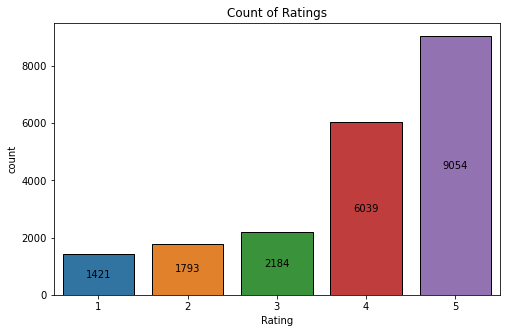

In [25]:
#Visualizing the unique values of ratings
plt.figure(figsize=(8,5))

ax = sns.countplot(data = text_data , x = 'Rating', edgecolor='black', linewidth=1)

for i in ax.containers:
    ax.bar_label(i, label_type='center')
    
plt.title('Count of Ratings')
plt.show()

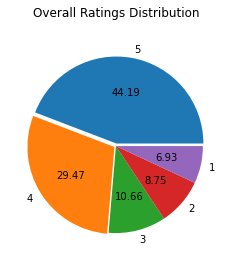

In [30]:
#Checking the total contribution of all ratings
plt.pie(text_data['Rating'].value_counts(), autopct='%0.2f', labels=['5', '4', '3', '2', '1'], explode=[0.03, 0.02, 0.0, 0.0, 0.0])
plt.title('Overall Ratings Distribution\n')
plt.show()

In [33]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          #background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
                        
    plt.figure(figsize = (6, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

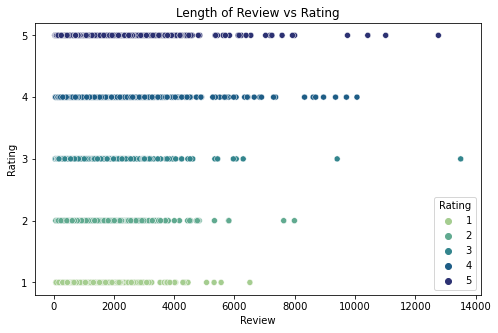

In [38]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=text_data['Review'].apply(len), y=text_data['Rating'], data=text_data, palette='crest', hue='Rating')
plt.title('Length of Review vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

# Copy of the original dataset

In [39]:
#Making a copy of the original dataset
text_data1 = text_data.copy()

In [40]:
#Preview of dataset
text_data1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
